In [1]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

<h2>Declaración de funciones generales</h2>

In [78]:
def transformar_datos(dataset):
    
    # Utilizamos el diccionario para adaptar los datos
    for i in range(dataset.datos.shape[0]):
        for j in range(dataset.datos.shape[1]):
            if dataset.nominalAtributos[j]:
                dataset.datos[i, j] = dataset.diccionario[j][dataset.datos[i, j]]
                
    

def get_train_test(dataset, seed=None, p=0.2):
    vs = ValidacionSimple(p, 1)
    particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

    datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
    datostest = dataset.extraeDatos(particiones[0].indicesTest)
    datostrain = datostrain.astype('float32')
    datostest = datostest.astype('float32')
    return datostrain, datostest


<h1> Apartado 1 <\h1>

Por simplicidad, durante estas pruebas se va a utilizar validación simple.

Esquema de las ejecuciones:

1. Datos normalizados


    1.1. Dataset: wdbc
        1.1.1. Distancia: Euclidea
        1.1.2. Distancia: Manhattan
        1.1.3. Distancia: Mahalanobis
        
        
    1.2. Dataset: pima-indians-diabetes
        1.2.1. Distancia: Euclidea
        1.2.2. Distancia: Manhattan
        1.2.3. Distancia: Mahalanobis
        
2. Datos sin normalizar


    2.1. Dataset: wdbc
        2.1.1. Distancia: Euclidea
        2.1.2. Distancia: Manhattan
        2.1.3. Distancia: Mahalanobis
        
        
    2.2. Dataset: pima-indians-diabetes
        2.2.1. Distancia: Euclidea
        2.2.2. Distancia: Manhattan
        2.2.3. Distancia: Mahalanobis

3. Comparación de los datos obtenidos

<h2> Clasificador Vecinos Próximos <\h2>

In [79]:
k_values = np.arange(1, 50)

<h3>1. Datos normalizados</h3>

<h3>1.1 wdbc.data</h3>

In [80]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed=0
p=0.2

datostrain, datostest = get_train_test(dataset,seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

<h4>1.1.1. Distancia euclídea</h4>

In [81]:
k_precision_wdbc_euclidean_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_wdbc_euclidean_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.1.2 Distancia Manhattan</h4>

In [82]:
k_precision_wdbc_manhattan_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_wdbc_manhattan_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.1.3 Distancia Mahalanobis</h4>

In [83]:
k_precision_wdbc_mahalanobis_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_wdbc_mahalanobis_norm[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

Representamos las gráficas correspondientes a las tres distancias:

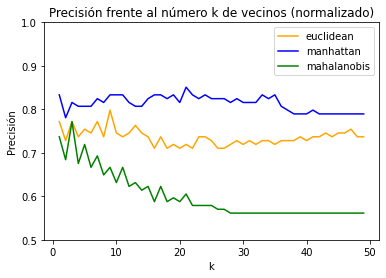

In [84]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Observamos que las distancias euclidean y manhattan proporcionan aproximadamente los mismos resultados mientras que mahalanobis es significativamente peor.

<h3>1.2 pima-indians-diabetes.data</h3>

In [85]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

<h4>1.2.1 Distancia euclídea</h4>

In [86]:
k_precision_pima_euclidean_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_pima_euclidean_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.2.2 Distancia Manhattan</h4>

In [87]:
k_precision_pima_manhattan_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_pima_manhattan_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.2.3 Distancia Mahalanobis</h4>

In [88]:
k_precision_pima_mahalanobis_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_pima_mahalanobis_norm[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

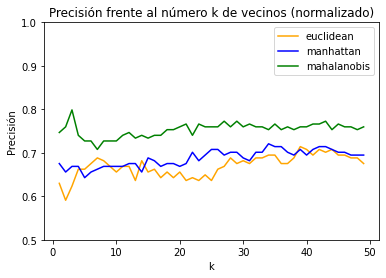

In [89]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Para este conjunto de datos vemos que las tres distancias nos devuelven aproximadamente los mismos resultados. 

<h3>2. Datos sin normalizar</h3>

<h3>2.1 wdbc.data</h3>

In [90]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed=0
p=0.2
datostrain, datostest = get_train_test(dataset,seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, norm=False)

<h4>2.1.1 Distancia euclídea</h4>

In [91]:
k_precision_wdbc_euclidean = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_wdbc_euclidean[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.1.2 Distancia Manhattan</h4>

In [92]:
k_precision_wdbc_manhattan = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_wdbc_manhattan[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.1.3 Distancia Mahalanobis</h4>

In [93]:
k_precision_wdbc_mahalanobis = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_wdbc_mahalanobis[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

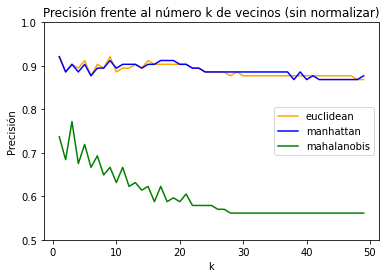

In [94]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

Para este conjunto de datos el comportamiento de datos sin normalizar es similar a los datos normalizados.

<h3>2.2 pima-indians-diabetes.data</h3>

In [95]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)

seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, norm=False)

<h4>2.2.1 Distancia euclídea</h4>

In [96]:
k_precision_pima_euclidean = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_pima_euclidean[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.2.2 Distancia Manhattan</h4>

In [97]:
k_precision_pima_manhattan = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_pima_manhattan[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.2.3 Distancia Mahalanobis</h4>

In [98]:
k_precision_pima_mahalanobis = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_pima_mahalanobis[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

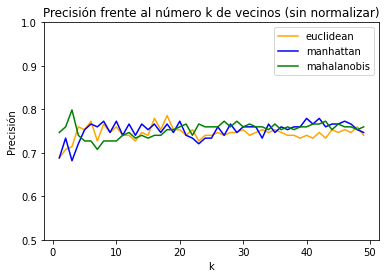

In [99]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

Para el conjunto prima-indians-diabetes también.

<h3>3. Comparación de los datos obtenidos</h3>

Un resumen de todas las gráficas

Para el dataset wdbc:

Comparación de las distancias para datos normalizados:

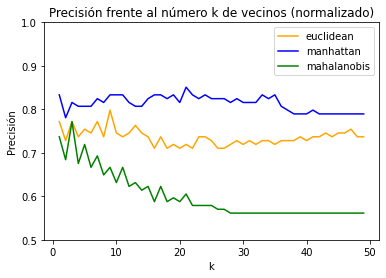

In [100]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Comparación de las distancias para datos no normalizados:

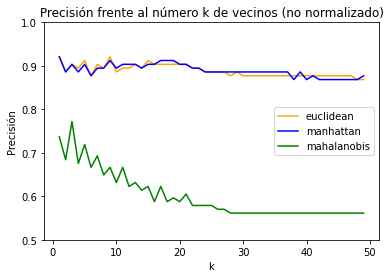

In [101]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (no normalizado)")
plt.show()

Comparación para cada una de las distancias entre la versión normalizada y sin normalizar:

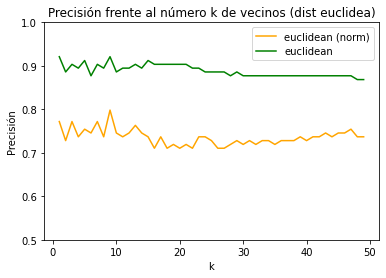

In [102]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='euclidean (norm)')
plt.plot(k_values, k_precision_wdbc_euclidean, color='g', label='euclidean')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

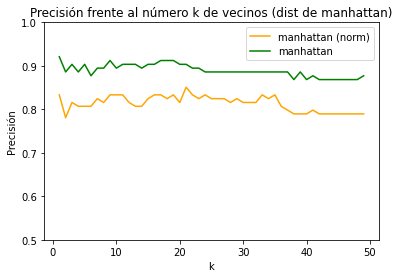

In [103]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_manhattan_norm, color='orange', label='manhattan (norm)')
plt.plot(k_values, k_precision_wdbc_manhattan, color='g', label='manhattan')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de manhattan)")
plt.show()

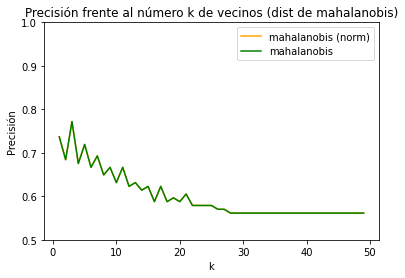

In [104]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm, color='orange', label='mahalanobis (norm)')
plt.plot(k_values, k_precision_wdbc_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de mahalanobis)")
plt.show()

Se observa que para el conjundo de datos wdcb el resultado que se obtiene al utilizar los datos normalizados es ligeramente mejor que al utilizar datos no normalizados para las distancias euclidea y de manhattan. Para la distancia de mahalanobis el resultado es exactamente el mismo. 

Para el dataset pima-indians-diabetes:

Comparación de las distancias para datos normalizados:

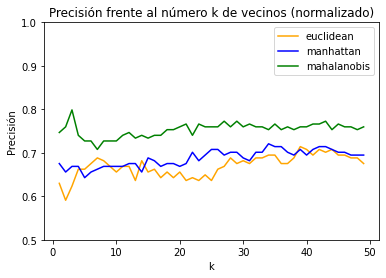

In [105]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Comparación de las distancias para datos no noramlizados:

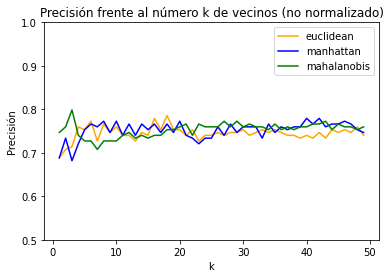

In [106]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (no normalizado)")
plt.show()

Comparación para cada una de las distancias entre la versión normalizada y sin normalizar:

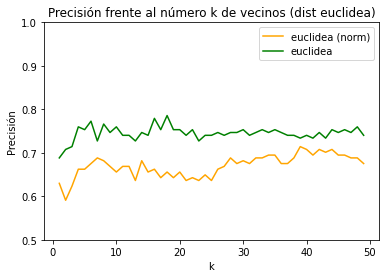

In [107]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='euclidea (norm)')
plt.plot(k_values, k_precision_pima_euclidean, color='g', label='euclidea')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

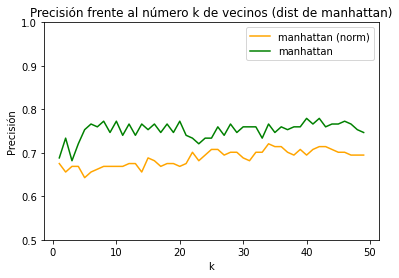

In [108]:
plt.figure()
plt.plot(k_values, k_precision_pima_manhattan_norm, color='orange', label='manhattan (norm)')
plt.plot(k_values, k_precision_pima_manhattan, color='g', label='manhattan')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de manhattan)")
plt.show()

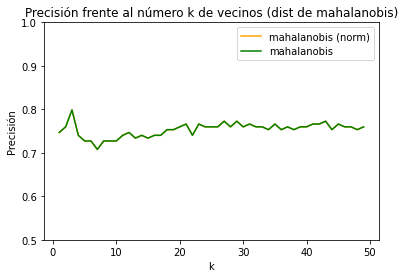

In [109]:
plt.figure()
plt.plot(k_values, k_precision_pima_mahalanobis_norm, color='orange', label='mahalanobis (norm)')
plt.plot(k_values, k_precision_pima_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de mahalanobis)")
plt.show()

Este comportameinto se repite para el conjunto de datos pima-indians-diabetes.

<h1> Apartado 2 <\h1>

<h2>Clasificador de RegresionLogistica</h2>

In [24]:
n_epocas_values=np.arange(1000, 10000, 2000)
alpha_values = np.arange(0.001, 0.011, 0.001)

<h3>wdbc.data</h3>

In [25]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

epocas_precision_wdbc = np.empty((n_epocas_values.shape[0], alpha_values.shape[0]) )

i = 0

for n_epocas in n_epocas_values:
    j = 0
    for alpha in alpha_values:
        cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
        cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
        prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

        epocas_precision_wdbc[i][j] = 1-cl.error(datostest, prediccion)
        j += 1
        
    i += 1

C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:308: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


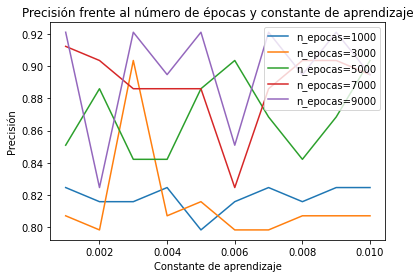

In [28]:
plt.figure()
for i in range(epocas_precision_wdbc.shape[0]):
    plt.plot(alpha_values, epocas_precision_wdbc[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.title("Precisión frente al número de épocas y constante de aprendizaje")
plt.legend(loc = "upper right")
plt.show()

<h3>pima-indians-diabetes.data</h3>

In [58]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

epocas_precision_pima = np.empty(len(n_epocas_values))

cnt = 0

for n_epocas in n_epocas_values:
    cl = ClasificadorRegresionLogistica(alpha=0.01, n_epocas=n_epocas)
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    epocas_precision_pima[cnt] = 1-cl.error(datostest, prediccion)
    cnt += 1

C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:297: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [59]:
print(epocas_precision_pima)

[0.72727273 0.75324675 0.72727273 0.74025974 0.72727273 0.7012987
 0.67532468 0.72727273 0.68831169 0.75974026]


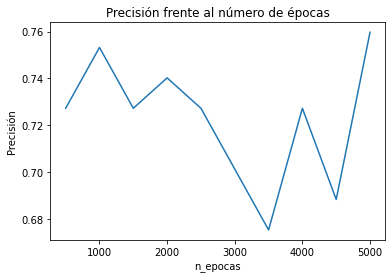

In [21]:
plt.figure()
plt.plot(n_epocas_values, epocas_precision_pima)
plt.xlabel("n_epocas")
plt.ylabel("Precisión")
plt.ylim(0.5, 1)
plt.title("Precisión frente al número de épocas y constante de aprendizaje pima")
plt.legend(loc = "upper right")
plt.show()

<h1> Apartado 3 <\h1>

<h2>Comparación con Scikit-Learn</h2>

<h2> Clasificador de Vecinos Próximos <\h2>

De forma análoga a los dos apartados anteriores realizaremos varias pruebas siguiendo el siguiente esquema:
1. Datos normalizados


    1.1. Dataset: wdbc
        1.1.1. Distancia: Euclidea
        1.1.2. Distancia: Manhattan
        1.1.3. Distancia: Mahalanobis
        
        
    1.2. Dataset: pima-indians-diabetes
        1.2.1. Distancia: Euclidea
        1.2.2. Distancia: Manhattan
        1.2.3. Distancia: Mahalanobis
        
2. Datos sin normalizar


    2.1. Dataset: wdbc
        2.1.1. Distancia: Euclidea
        2.1.2. Distancia: Manhattan
        2.1.3. Distancia: Mahalanobis
        
        
    2.2. Dataset: pima-indians-diabetes
        2.2.1. Distancia: Euclidea
        2.2.2. Distancia: Manhattan
        2.2.3. Distancia: Mahalanobis
        
3. Comparación de los datos obtenidos

4. Comparación de scikit con la implementación propia

<h3> 1. Datos normalizados <\h3>

Por defecto el clasificador KNeighborsClassifier no normaliza los datos pero scikit proporciona un modulo de preprocessing, el cual utilizaremos para normalizar los datos. 

<h4> 1.1 Dataset: wdbc <\h4>

In [10]:
archivo = 'wdbc.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Ejecutamos como prueba el algoritmo de clasificación de vecinos próximos primero con n_vecinos = 5 y distancia euclidea:

In [11]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', metric='euclidean', metric_params=None, n_jobs=None).fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.956140350877193


Hacemos ahora el mismo experimento que en el apartado anterior con este conjunto de datos mostrando la gráfica comparativa de las distancias al final.

<h4> 1.1.1 Distancia: Euclídea <\h4>

In [12]:
k_precision_wdbc_euclidean_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train_norm, y_train)
    k_precision_wdbc_euclidean_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.1.2 Distancia: Manhattan <\h4>

In [13]:
k_precision_wdbc_manhattan_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train_norm, y_train)
    k_precision_wdbc_manhattan_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.1.3 Distancia: Mahalanobis <\h4>

In [14]:
k_precision_wdbc_mahalanobis_norm_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm.T))
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train_norm, y_train)
    k_precision_wdbc_mahalanobis_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

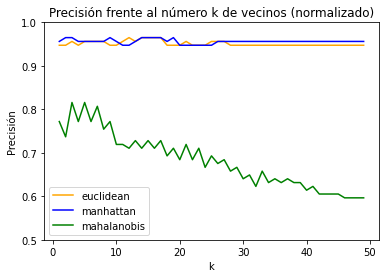

In [15]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_norm_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

En este caso se representan la precisión de clasificacion según tres distancias para el conjunto de datos wdbc. Se tiene aproximadamente el mimsmo comportamiento que en nuestras funciones: los resultados de la distancia euclidea y manhattan son muy parecidas y bastante mejores a la distancia mahalanobis. 

<h4> 1.2 Dataset: pima-indians-diabetes <\h4>

In [112]:
archivo = 'pima-indians-diabetes.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

<h4> 1.2.1 Distancia: Euclídea <\h4>

In [113]:
k_precision_pima_euclidean_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train_norm, y_train)
    k_precision_pima_euclidean_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.2.2 Distancia: Manhattan <\h4>

In [114]:
k_precision_pima_manhattan_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train_norm, y_train)
    k_precision_pima_manhattan_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.2.3 Distancia: Mahalanobis <\h4>

In [115]:
k_precision_pima_mahalanobis_norm_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train_norm, y_train)
    k_precision_pima_mahalanobis_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

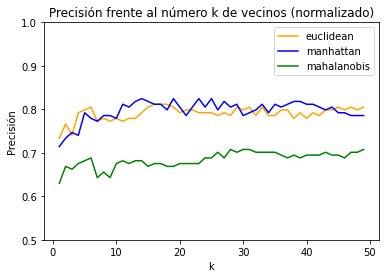

In [116]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_norm_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_norm_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Para este conjunto de datos las distancias euclidea y de manhattan muestran una precisión similar mientras que la distancia de mahalanobis es algo peor. Aunque hay menos diferencia entre mahalanobis y las otras dos distancias que en el conjunto de datos anterior.

<h3> 2. Datos sin normalizar <\h3>

<h4> 2.1 Dataset: wdbc <\h4>

In [82]:
archivo = 'wdbc.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

<h4> 2.1.1 Distancia: Euclídea <\h4>

In [83]:
k_precision_wdbc_euclidean_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train, y_train)
    k_precision_wdbc_euclidean_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.2 Distancia: Manhattan <\h4>

In [84]:
k_precision_wdbc_manhattan_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train, y_train)
    k_precision_wdbc_manhattan_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.3 Distancia: Mahalanobis <\h4>

In [85]:
k_precision_wdbc_mahalanobis_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train, y_train)
    k_precision_wdbc_mahalanobis_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

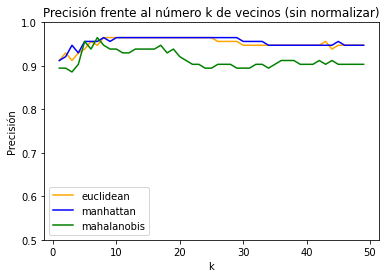

In [86]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

<h4> 2.2 Dataset: pima-indians-diabetes <\h4>

In [87]:
archivo = 'pima-indians-diabetes.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

<h4> 2.1.1 Distancia: Euclídea <\h4>

In [88]:
k_precision_pima_euclidean_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train, y_train)
    k_precision_pima_euclidean_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.2 Distancia: Manhattan <\h4>

In [89]:
k_precision_pima_manhattan_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train, y_train)
    k_precision_pima_manhattan_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.3 Distancia: Mahalanobis <\h4>

In [90]:
k_precision_pima_mahalanobis_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train, y_train)
    k_precision_pima_mahalanobis_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

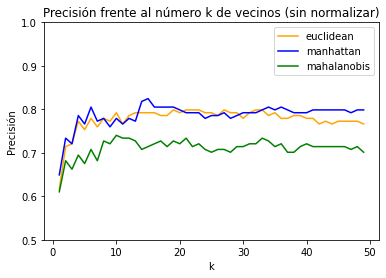

In [91]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

Las tres distancias muestran una presición similar para ambos conjutnos de datos.

<h3>3. Comparación de los datos obtenidos</h3>

Inluimos ahora las comparaciones entre versiones normalizadas y sin normalizar para cada distancia

Para dataset wdcb:

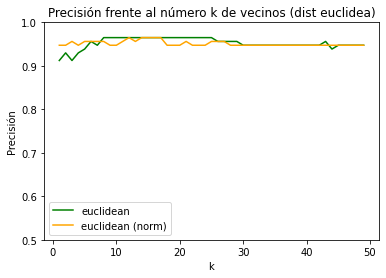

In [92]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_scikit, color='green', label='euclidean')
plt.plot(k_values, k_precision_wdbc_euclidean_norm_scikit, color='orange', label='euclidean (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

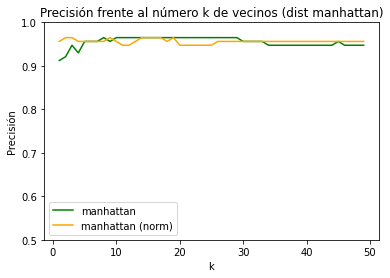

In [93]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_manhattan_scikit, color='green', label='manhattan')
plt.plot(k_values, k_precision_wdbc_manhattan_norm_scikit, color='orange', label='manhattan (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist manhattan)")
plt.show()

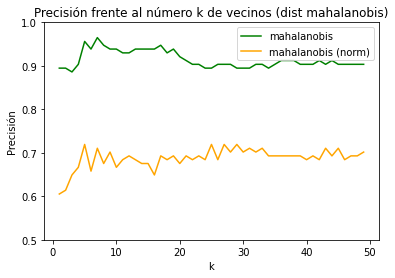

In [94]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_mahalanobis_scikit, color='green', label='mahalanobis')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm_scikit, color='orange', label='mahalanobis (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist mahalanobis)")
plt.show()

Para dataset pima-indians-diabetes:

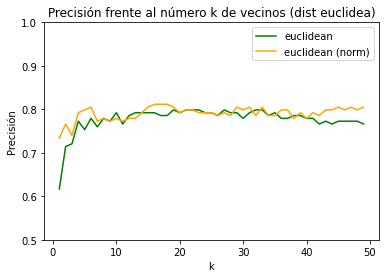

In [118]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_scikit, color='green', label='euclidean')
plt.plot(k_values, k_precision_pima_euclidean_norm_scikit, color='orange', label='euclidean (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

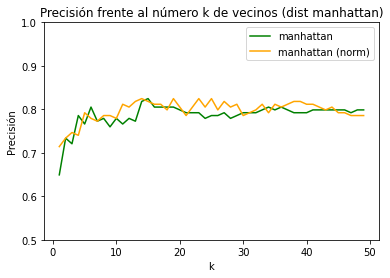

In [119]:
plt.figure()
plt.plot(k_values, k_precision_pima_manhattan_scikit, color='green', label='manhattan')
plt.plot(k_values, k_precision_pima_manhattan_norm_scikit, color='orange', label='manhattan (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist manhattan)")
plt.show()

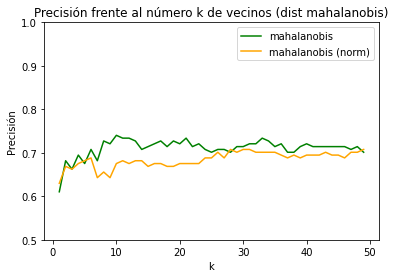

In [120]:
plt.figure()
plt.plot(k_values, k_precision_pima_mahalanobis_scikit, color='green', label='mahalanobis')
plt.plot(k_values, k_precision_pima_mahalanobis_norm_scikit, color='orange', label='mahalanobis (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist mahalanobis)")
plt.show()

La precisión es muy parecida para datos normalizados y sin normalizar para las distancias euclidea y manhattan. En cambio, para la distancia mahalanobis en el conjunto wdbc el caso normalizado es bastante peor.

<h3>4. Comparación de scikit con la implementación propia</h3>

Comparación de resultados entre nuestra implementación y el algoritmo de scikit learn con distancia euclidea y conjunto de datos wdbc:


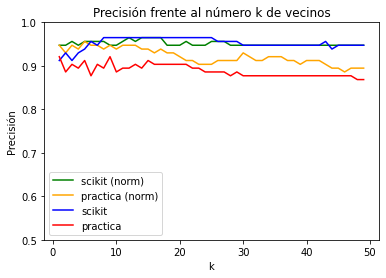

In [98]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm_scikit, color='green', label='scikit (norm)')
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='practica (norm)')
plt.plot(k_values, k_precision_wdbc_euclidean_scikit, color='blue', label='scikit')
plt.plot(k_values, k_precision_wdbc_euclidean, color='red', label='practica')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos")
plt.show()

Comparación de resultados entre nuestra implementación y el algoritmo de scikit learn con distancia euclidea y conjunto de datos pima-indians-diabetes:

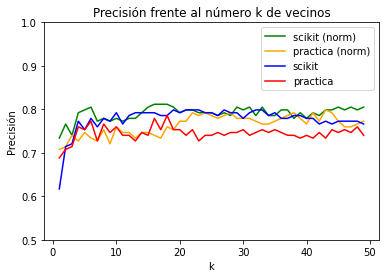

In [99]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm_scikit, color='green', label='scikit (norm)')
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='practica (norm)')
plt.plot(k_values, k_precision_pima_euclidean_scikit, color='blue', label='scikit')
plt.plot(k_values, k_precision_pima_euclidean, color='red', label='practica')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos")
plt.show()

Los resultados de nuestra implementación son muy parecidos a los resultados obtenidos con sckit learn. Siendo para ambos conjuntos de datos los resultados de sckit algo mejores.

Se puede destacar que tanto nuestra implementación como la implementación de scikit tiene una precisión mayor para el conjunto wdbc (mas de 90% de aciertos) que para el conjunto de pima-indians-diabetes (en torno al 80%).

<h2> Clasificador de Regresión Logistica <\h2>

In [120]:
n_epocas_values=np.arange(500, 5000, 1000)
alpha_values = np.arange(0.001, 0.011, 0.002)
seed = 0
p = 0.2

Esquema:

1. Dataset: wdbc
       
2. Dataset: pima-indians-diabetes

3. Comparación de scikit con la implementación propia

<h3>1. Dataset: wdbc.data</h3>

In [147]:
archivo = 'wdbc.data'

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

In [148]:
epocas_precision_wdbc_scikit = np.zeros((len(n_epocas_values), len(alpha_values)))

i=0
for n_epocas in n_epocas_values:
    j = 0
    for alpha in alpha_values:
        cl = LogisticRegression(random_state=seed, max_iter=n_epocas, C=alpha)
        cl.fit(X_train, y_train)
        epocas_precision_wdbc_scikit[i][j] = cl.score(X_test, y_test)
        j += 1
        
    i += 1

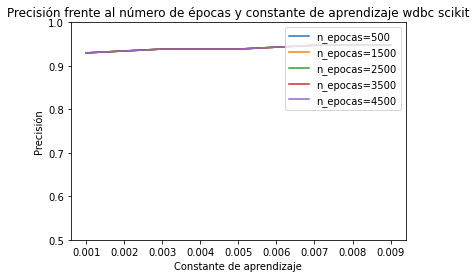

In [149]:
plt.figure()
for i in range(epocas_precision_wdbc_scikit.shape[0]):
    plt.plot(alpha_values, epocas_precision_wdbc_scikit[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.ylim(0.5, 1)
plt.title("Precisión frente al número de épocas y constante de aprendizaje wdbc scikit")
plt.legend(loc = "upper right")
plt.show()

Para los mismos valores del número de épocas y de la constante de aprendizaje que ejecutamos para nuestra implementación de regresión logística, observamos que la implementación de Scikit converge antes de las 500 épocas, ya que las 5 gráficas están solapadas.

<h3>2. Dataset: pima-indians-diabetes.data</h3>

In [150]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

In [151]:
epocas_precision_pima_scikit = np.zeros((len(n_epocas_values), len(alpha_values)))

i=0
for n_epocas in n_epocas_values:
    j = 0
    for alpha in alpha_values:
        cl = LogisticRegression(random_state=seed, max_iter=n_epocas, C=alpha)
        cl.fit(X_train, y_train)
        epocas_precision_pima_scikit[i][j] = cl.score(X_test, y_test)
        j += 1
        
    i += 1

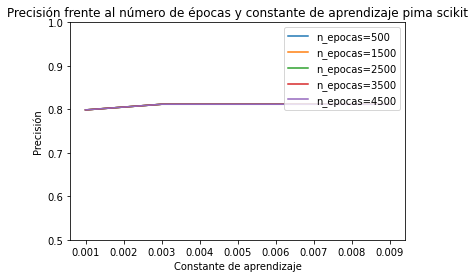

In [152]:
plt.figure()
for i in range(epocas_precision_pima_scikit.shape[0]):
    plt.plot(alpha_values, epocas_precision_pima_scikit[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.ylim(0.5, 1)
plt.title("Precisión frente al número de épocas y constante de aprendizaje pima scikit")
plt.legend(loc = "upper right")
plt.show()

Ocurre lo mismo que con el dataset anterior.

<h3>3. Comparación de scikit con la implementación propia</h3>

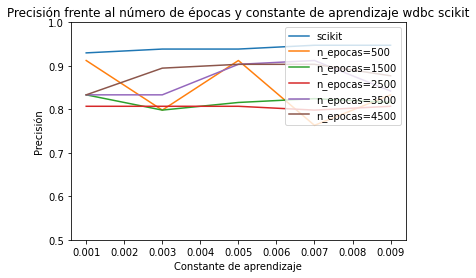

In [155]:
plt.figure()
plt.plot(alpha_values, epocas_precision_wdbc_scikit[0], label="scikit")
for i in range(epocas_precision_pima_scikit.shape[0]):
    plt.plot(alpha_values, epocas_precision_wdbc[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.ylim(0.5, 1)
plt.title("Precisión frente al número de épocas y constante de aprendizaje wdbc scikit")
plt.legend(loc = "upper right")
plt.show()

Observamos que scikit es más estable y nos proporciona una mayor precisión. Esto puede deberse a las regularizaciones que ejecuta scikit sobre los datos y a los distintos parámetros que recibe.

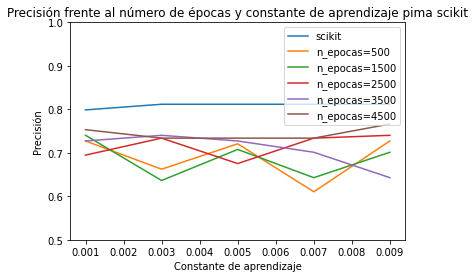

In [156]:
plt.figure()
plt.plot(alpha_values, epocas_precision_pima_scikit[0], label="scikit")
for i in range(epocas_precision_pima_scikit.shape[0]):
    plt.plot(alpha_values, epocas_precision_pima[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.ylim(0.5, 1)
plt.title("Precisión frente al número de épocas y constante de aprendizaje pima scikit")
plt.legend(loc = "upper right")
plt.show()

<h2>Evaluación de hipótesis mediante Análisis ROC</h2>

In [22]:
p = 0.2
seed = 0

def get_ROC_data(conf_data, clases, ocurrencias_clases):
    
    matriz_conf = np.zeros((2, 2))
    matriz_conf[0][0] = ocurrencias_clases[clases[1]]
    matriz_conf[0][1] = ocurrencias_clases[clases[0]]
    tpr = np.empty(len(datostest))
    fpr = np.empty(len(datostest))

    for i in range(len(conf_data)):
        if conf_data[i][1] == clases[0]: # Dato negativo
            matriz_conf[1][1] += 1 #TN
            matriz_conf[0][1] -= 1 #FP

        else: # Dato positivo
            matriz_conf[1][0] += 1 #FN
            matriz_conf[0][0] -= 1 #TP


        tpr[i] = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[1][0])

        fpr[i] = matriz_conf[0][1]/(matriz_conf[0][1]+matriz_conf[1][1])
    
    return tpr, fpr

def get_matriz_conf(datostest, prediccion, clases):
    matriz_conf = np.zeros((2, 2))
    
    for i in range(len(datostest)):
        if prediccion[i] == clases[0]:
            if datostest[i][-1] == clases[0]: # TN
                matriz_conf[1][1] += 1
            else: # FN 
                matriz_conf[1][0] += 1
        else:
            if datostest[i][-1] == clases[0]: # FP
                matriz_conf[0][1] += 1
            else: # TP
                matriz_conf[0][0] += 1
    
    return matriz_conf

<h3>Naive-Bayes</h3>

<h4>wdbc.data</h4>

In [23]:
archivo = 'wdbc.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [24]:
tpr_wdbc_bayes, fpr_wdbc_bayes = get_ROC_data(conf_data, clases, counts)
matriz_conf_wdbc_bayes = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [25]:
print("Matriz de confusión wdbc.data Naive-Bayes")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_wdbc_bayes[0][0], " \t\t ", matriz_conf_wdbc_bayes[0][1])
print("\t Negativo ", matriz_conf_wdbc_bayes[1][0], " \t\t ", matriz_conf_wdbc_bayes[1][1])

Matriz de confusión wdbc.data Naive-Bayes

				Real
		  Positivo		Negativo
Estimado Positivo  42.0  		  7.0
	 Negativo  9.0  		  56.0


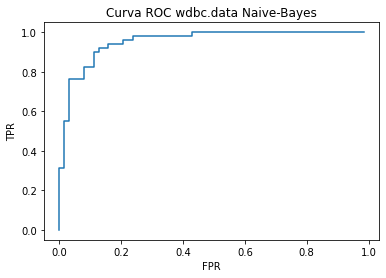

In [26]:
plt.figure()
plt.plot(fpr_wdbc_bayes, tpr_wdbc_bayes)
plt.title("Curva ROC wdbc.data Naive-Bayes")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h4>pima-indians-diabetes.data</h4>

In [27]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [28]:
tpr_pima_bayes, fpr_pima_bayes = get_ROC_data(conf_data, clases, counts)
matriz_conf_pima_bayes = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [29]:
print("Matriz de confusión pima-indians-diabetes.data Naive-Bayes")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_pima_bayes[0][0], " \t\t ", matriz_conf_pima_bayes[0][1])
print("\t Negativo ", matriz_conf_pima_bayes[1][0], " \t\t ", matriz_conf_pima_bayes[1][1])

Matriz de confusión pima-indians-diabetes.data Naive-Bayes

				Real
		  Positivo		Negativo
Estimado Positivo  27.0  		  15.0
	 Negativo  24.0  		  88.0


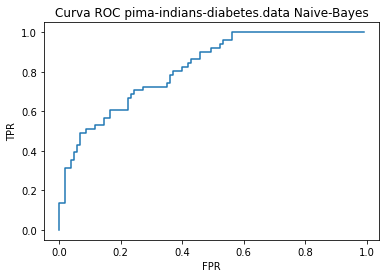

In [30]:
plt.figure()
plt.plot(fpr_pima_bayes, tpr_pima_bayes)
plt.title("Curva ROC pima-indians-diabetes.data Naive-Bayes")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h3>Regresión Logística</h3>

Vamos a hacer la curva ROC para unos valores de la constante de aprendizaje y el número de épocas que consideramos que ofrecen buenos resultados.

In [31]:
alpha = 0.001
n_epocas = 10000

<h4>wdbc.data</h4>

In [32]:
archivo = 'wdbc.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)


C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:327: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [33]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.sigmoid(np.inner(np.concatenate(([1], datostest[i][:-1])), cl.w)), datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [34]:
tpr_wdbc_logistica, fpr_wdbc_logistica = get_ROC_data(conf_data, clases, counts)
matriz_conf_wdbc_logistica = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [35]:
print("Matriz de confusión wdbc.data Regresión Logística")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_wdbc_logistica[0][0], " \t\t ", matriz_conf_wdbc_logistica[0][1])
print("\t Negativo ", matriz_conf_wdbc_logistica[1][0], " \t\t ", matriz_conf_wdbc_logistica[1][1])

Matriz de confusión wdbc.data Regresión Logística

				Real
		  Positivo		Negativo
Estimado Positivo  46.0  		  3.0
	 Negativo  5.0  		  60.0


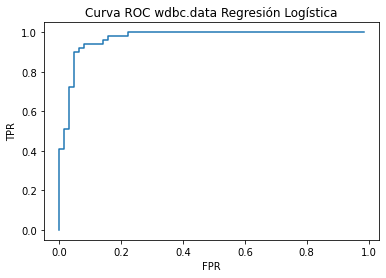

In [36]:
plt.figure()
plt.plot(fpr_wdbc_logistica, tpr_wdbc_logistica)
plt.title("Curva ROC wdbc.data Regresión Logística")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h4>pima-indians-diabetes.data</h4>

In [37]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)


In [38]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.sigmoid(np.inner(np.concatenate(([1], datostest[i][:-1])), cl.w)), datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [39]:
tpr_pima_logistica, fpr_pima_logistica = get_ROC_data(conf_data, clases, counts)
matriz_conf_pima_logistica = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [40]:
print("Matriz de confusión pima-indians-diabetes.data Regresión Logística")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_pima_logistica[0][0], " \t\t ", matriz_conf_pima_logistica[0][1])
print("\t Negativo ", matriz_conf_pima_logistica[1][0], " \t\t ", matriz_conf_pima_logistica[1][1])

Matriz de confusión pima-indians-diabetes.data Regresión Logística

				Real
		  Positivo		Negativo
Estimado Positivo  31.0  		  17.0
	 Negativo  20.0  		  86.0


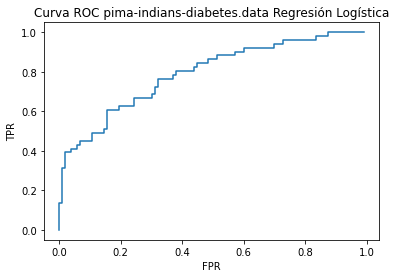

In [58]:
plt.figure()
plt.plot(fpr_pima_logistica, tpr_pima_logistica)
plt.title("Curva ROC pima-indians-diabetes.data Regresión Logística")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h3>Vecinos Próximos</h3>

Vamos a hacer la curva ROC para un valor de número de vecinos que ha ofrecido buenos resultados en ambos datasets y con distancia euclídea.

In [59]:
k = 20

<h4>wdbc.data</h4>

In [60]:
archivo = 'wdbc.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k)


In [61]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [62]:
tpr_wdbc_vecinos, fpr_wdbc_vecinos = get_ROC_data(conf_data, clases, counts)
matriz_conf_wdbc_vecinos = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [63]:
print("Matriz de confusión wdbc.data Vecinos Próximos")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_wdbc_vecinos[0][0], " \t\t ", matriz_conf_wdbc_vecinos[0][1])
print("\t Negativo ", matriz_conf_wdbc_vecinos[1][0], " \t\t ", matriz_conf_wdbc_vecinos[1][1])

Matriz de confusión wdbc.data Vecinos Próximos

				Real
		  Positivo		Negativo
Estimado Positivo  28.0  		  10.0
	 Negativo  23.0  		  53.0


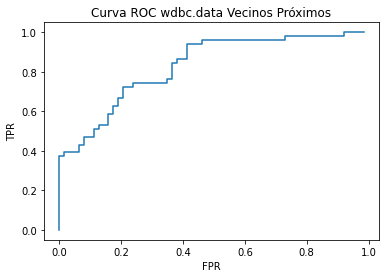

In [64]:
plt.figure()
plt.plot(fpr_wdbc_vecinos, tpr_wdbc_vecinos)
plt.title("Curva ROC wdbc.data Vecinos Próximos")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h4>pima-indians-diabetes.data</h4>

In [65]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k)


In [66]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [67]:
tpr_pima_vecinos, fpr_pima_vecinos = get_ROC_data(conf_data, clases, counts)
matriz_conf_pima_vecinos = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [68]:
print("Matriz de confusión pima-indians-diabetes.data Vecinos Próximos")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_pima_vecinos[0][0], " \t\t ", matriz_conf_pima_vecinos[0][1])
print("\t Negativo ", matriz_conf_pima_vecinos[1][0], " \t\t ", matriz_conf_pima_vecinos[1][1])

Matriz de confusión pima-indians-diabetes.data Vecinos Próximos

				Real
		  Positivo		Negativo
Estimado Positivo  11.0  		  13.0
	 Negativo  40.0  		  90.0


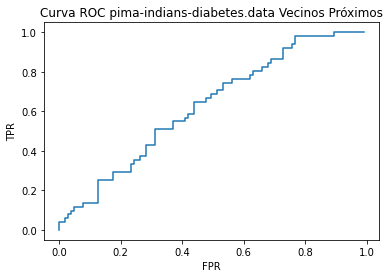

In [69]:
plt.figure()
plt.plot(fpr_pima_vecinos, tpr_pima_vecinos)
plt.title("Curva ROC pima-indians-diabetes.data Vecinos Próximos")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h3>Comparación de las curvas por datasets</h3>

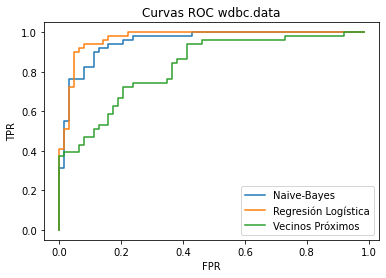

In [70]:
plt.figure()
plt.plot(fpr_wdbc_bayes, tpr_wdbc_bayes, label="Naive-Bayes")
plt.plot(fpr_wdbc_logistica, tpr_wdbc_logistica, label="Regresión Logística")
plt.plot(fpr_wdbc_vecinos, tpr_wdbc_vecinos, label="Vecinos Próximos")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC wdbc.data")
plt.show()

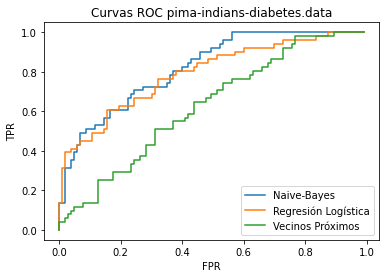

In [71]:
plt.figure()
plt.plot(fpr_pima_bayes, tpr_pima_bayes, label="Naive-Bayes")
plt.plot(fpr_pima_logistica, tpr_pima_logistica, label="Regresión Logística")
plt.plot(fpr_pima_vecinos, tpr_pima_vecinos, label="Vecinos Próximos")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC pima-indians-diabetes.data")
plt.show()

<h3>AUC</h3>

A continuación, vamos a calcular las áreas bajo las curvas ROC (AUC) para determinar la calidad de cada método:

In [72]:
def AUC(fpr, tpr):

    auc = 0
    for i in range(len(tpr)-1):
        auc += (fpr[i]-fpr[i+1])*tpr[i]
    
    auc += fpr[-1]*tpr[-1]
        
    return auc

In [73]:
auc_wdbc_bayes = AUC(fpr_wdbc_bayes, tpr_wdbc_bayes)
auc_pima_bayes = AUC(fpr_pima_bayes, tpr_pima_bayes)

auc_wdbc_logistica = AUC(fpr_wdbc_logistica, tpr_wdbc_logistica)
auc_pima_logistica = AUC(fpr_pima_logistica, tpr_pima_logistica)

auc_wdbc_vecinos = AUC(fpr_wdbc_vecinos, tpr_wdbc_vecinos)
auc_pima_vecinos = AUC(fpr_pima_vecinos, tpr_pima_vecinos)

In [74]:
print("AUC wdbc.data Naive-Bayes:", auc_wdbc_bayes)
print("AUC wdbc.data Regresión Logística:", auc_wdbc_logistica)
print("AUC wdbc.data Vecinos Próximos:", auc_wdbc_vecinos)
print()
print("AUC pima-indians-diabetes.data Naive-Bayes:", auc_pima_bayes)
print("AUC pima-indians-diabetes.data Regresión Logística:", auc_pima_logistica)
print("AUC pima-indians-diabetes.data Vecinos Próximos:", auc_pima_vecinos)


AUC wdbc.data Naive-Bayes: 0.9374416433239959
AUC wdbc.data Regresión Logística: 0.9542483660130708
AUC wdbc.data Vecinos Próximos: 0.8141923436041082

AUC pima-indians-diabetes.data Naive-Bayes: 0.8102036931277368
AUC pima-indians-diabetes.data Regresión Logística: 0.7814582143537037
AUC pima-indians-diabetes.data Vecinos Próximos: 0.6173615077098795


En el primer dataset (wdbc.data), regresión logística es el que nos ofrece un mejor resultado, muy cerca de Naive-Bayes. Esto nos puede indicar que los datos tienen muy poca correlación, ya que entonces las estimaciones de Naive-Bayes son mejores y es el escenario ideal para regresión logística.

En el segundo dataset (pima-indians-diabetes.data), de nuevo Naive-Bayes y regresión logística nos ofrecen los mejores resultados, aunque con Naive-Bayes un poco mejor en este caso. 